<a href="https://colab.research.google.com/github/pupadh99/Activity-1-machine-learning/blob/main/copy_of_titanic_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
# Code here
#create a data frame where passengers are filtered by class
filtered_df = df_titanic[df_titanic["class"].isin(["1st", "2nd", "3rd"])]
#create a table showing number of passengers who embarked at each location given class
result_df=pd.crosstab(filtered_df["class"], filtered_df["embarked"])
#print result
print(result_df)

embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
# Code here
# conditional distribution of class given where passengers embarked
conditional_class_given_embarked = result_df.div(result_df.sum(axis=1), axis=0)

# conditional distribution of where they embarked given their class
conditional_embarked_given_class = result_df.div(result_df.sum(axis=0), axis=1)

# Print the first df
print("Conditional Distribution of Class given where they Embarked:")
print(conditional_class_given_embarked)

# print the second df
print("\nConditional Distribution of Where they Embarked given their Class:")
print(conditional_embarked_given_class)


Conditional Distribution of Class given where they Embarked:
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756

Conditional Distribution of Where they Embarked given their Class:
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


In [ ]:
# conditional distribution table of class given where they embarked
conditional_class_given_embarked = result_df.div(result_df.sum(axis=1), axis=0)
#print the df
print(conditional_class_given_embarked)
#calculate the proportion of 3rd class passengers who embarked at southampton
proportion_3rd_class_southampton = conditional_class_given_embarked.loc["3rd", "S"]
#print result
print(f"Proportion of 3rd class passengers embarked at Southampton: {proportion_3rd_class_southampton:.2f}")


embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756
Proportion of 3rd class passengers embarked at Southampton: 0.70


In [ ]:
import pandas as pd
# conditional distribution table of where a passnger embarked given class
conditional_embarked_given_class = result_df.div(result_df.sum(axis=0), axis=1)
#print the df
print(conditional_embarked_given_class)
#calculate the proportion of passengers who embarked at southamption and were 3rd class
probability_Southampton_3rd_class = conditional_embarked_given_class.loc["3rd", "S"]

# Print the result
print(f"Proportion of those who embarked at Southampton and were 3rd class: {probability_Southampton_3rd_class:.2f}")

embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
Proportion of those who embarked at Southampton and were 3rd class: 0.54


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

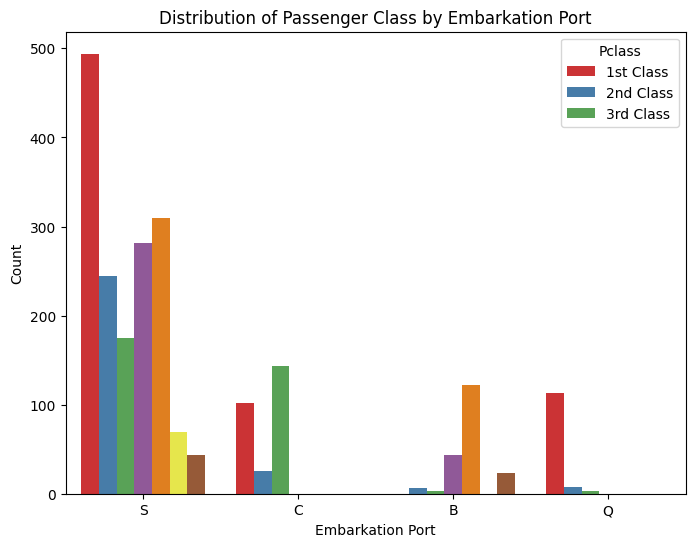

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL for the dataset
data_url = "https://dlsun.github.io/pods/data/titanic.csv"

# Create a DataFrame from the URL
df = pd.read_csv(data_url)

# Create a countplot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="embarked", hue="class", palette="Set1")  # Use lowercase column names
plt.title("Distribution of Passenger Class by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.legend(title="Pclass", labels=["1st Class", "2nd Class", "3rd Class"])
plt.show()

The pros of this visualization are that we can easily see the count of passengers who embarked at each port, and it is easily visualized by colorcoding the classes. A limitation is that it is not as precise as other visualizations, as the y axis is not as easy to read.